In [2]:
import pandas as pd
microdadosEnem = pd.read_csv("microdados_enem_2015\DADOS\MICRODADOS_ENEM_2015.csv", encoding = "ISO-8859-1", sep= ";")

In [3]:
colunasSelecionadasEnem = ['NU_INSCRICAO','NU_NOTA_MT', 'NU_NOTA_REDACAO','Q001','Q002']

In [4]:
dadosSelecionados = microdadosEnem.filter(items=colunasSelecionadasEnem)

In [32]:
dadosSelecionados.dropna()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_ESC
0,150000000376,732.3,760.0,A,A,RS
2,150000001161,566.5,640.0,E,C,PE
4,150000001219,732.4,800.0,B,C,MG
5,150000002884,576.4,480.0,D,C,SC
6,150000002510,685.5,820.0,F,F,SP
...,...,...,...,...,...,...
7746422,150007615879,381.3,520.0,E,F,RJ
7746423,150007393792,673.8,560.0,G,G,PR
7746424,150007525737,546.9,600.0,D,E,MG
7746425,150007415907,486.3,780.0,B,E,RN


In [41]:
q001_q002 = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4° série/5° ano do Ensino Fundamental.',
    'C': 'Completou a 4° série/5° ano, mas não completou a 8° série/9° ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei'
}

In [42]:
q001_q002

{'A': 'Nunca estudou',
 'B': 'Não completou a 4° série/5° ano do Ensino Fundamental.',
 'C': 'Completou a 4° série/5° ano, mas não completou a 8° série/9° ano do Ensino Fundamental.',
 'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
 'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
 'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
 'G': 'Completou a Pós-graduação.',
 'H': 'Não sei'}

In [8]:
dadosSelecionados.filter(items = ['Q001','NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,482477
B,1793568
C,1239346
D,959339
E,1819907
F,453032
G,249033
H,749041


<Axes: >

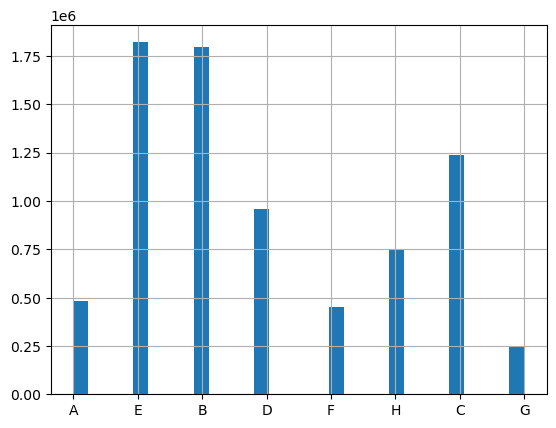

In [9]:
dadosSelecionados['Q001'].hist(bins=30)

In [10]:
dadosSelecionados

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,150000000376,732.3,760.0,A,A
1,150000003053,NaN,0.0,E,E
2,150000001161,566.5,640.0,E,C
3,150000001335,NaN,0.0,E,E
4,150000001219,732.4,800.0,B,C
...,...,...,...,...,...
7746422,150007615879,381.3,520.0,E,F
7746423,150007393792,673.8,560.0,G,G
7746424,150007525737,546.9,600.0,D,E
7746425,150007415907,486.3,780.0,B,E


In [11]:
dadosSelecionados.dropna()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,150000000376,732.3,760.0,A,A
2,150000001161,566.5,640.0,E,C
4,150000001219,732.4,800.0,B,C
5,150000002884,576.4,480.0,D,C
6,150000002510,685.5,820.0,F,F
...,...,...,...,...,...
7746422,150007615879,381.3,520.0,E,F
7746423,150007393792,673.8,560.0,G,G
7746424,150007525737,546.9,600.0,D,E
7746425,150007415907,486.3,780.0,B,E


In [35]:
import numpy as np

In [43]:
dadosSelecionados['NO_Q001'] = [
    q001_q002[resp] if resp in q001_q002 else np.nan for resp in dadosSelecionados.Q001
]

In [44]:
dadosSelecionados['NO_Q002'] = [
    q001_q002[resp] if resp in q001_q002 else np.nan for resp in dadosSelecionados.Q002
]

In [ ]:
dadosSelecionados.head()

In [ ]:
dadosSelecionados.filter(items=['NU_INSCRICAO','NO_Q001']).groupby('NO_Q001').count().sort_values(by = "NU_INSCRICAO", ascending=False)

In [ ]:
dadosSelecionados.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by = 'NU_NOTA_MT', ascending=False)

In [ ]:
dadosSelecionados.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by = 'NU_NOTA_MT', ascending=False)

In [ ]:
q002redacao = dadosSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').mean().sort_values(by = 'NU_NOTA_REDACAO', ascending=False)

In [ ]:
q002redacao

In [ ]:
q002redacao.plot()

In [ ]:
dadosSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').describe()

In [ ]:
dadosSelecionados[["NU_NOTA_REDACAO","NO_Q001"]].groupby('NO_Q001').describe()

In [45]:
colunasSelecionadasEnem = ['NU_INSCRICAO','SG_UF_ESC','NU_NOTA_MT', 'NU_NOTA_REDACAO','Q001','Q002']

In [46]:
dadosSelecionados["SG_UF_ESC"] = microdadosEnem.SG_UF_PROVA

In [47]:
dadosSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_ESC,NO_Q001,NO_Q002
0,150000000376,732.3,760.0,A,A,RS,Nunca estudou,Nunca estudou
1,150000003053,NaN,0.0,E,E,MG,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
2,150000001161,566.5,640.0,E,C,PE,"Completou o Ensino Médio, mas não completou a ...","Completou a 4° série/5° ano, mas não completou..."
3,150000001335,NaN,0.0,E,E,MG,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
4,150000001219,732.4,800.0,B,C,MG,Não completou a 4° série/5° ano do Ensino Fund...,"Completou a 4° série/5° ano, mas não completou..."


In [49]:
dadosSelecionados[["NU_NOTA_REDACAO","NO_Q001"]].where(dadosSelecionados.SG_UF_ESC == 'PR').groupby('NO_Q001').mean().sort_values(by = 'NU_NOTA_REDACAO', ascending = False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,537.884544
"Completou a Faculdade, mas não completou a Pós-graduação.",505.013463
"Completou o Ensino Médio, mas não completou a Faculdade.",433.460954
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",400.360498
"Completou a 4° série/5° ano, mas não completou a 8° série/9° ano do Ensino Fundamental.",374.049099
Não sei,346.476436
Não completou a 4° série/5° ano do Ensino Fundamental.,331.956525
Nunca estudou,292.681514


In [73]:
dadosSelecionados[(dadosSelecionados.NU_NOTA_REDACAO == 1000)][["SG_UF_ESC","NU_NOTA_REDACAO"]].groupby("SG_UF_ESC").count().sort_values(by = 'NU_NOTA_REDACAO', ascending = False)

,NU_NOTA_REDACAO
SG_UF_ESC,
MG,19
SP,16
RJ,15
CE,10
RS,6
PE,6
GO,5
DF,4
SC,4


In [84]:
contagem = dadosSelecionados[(dadosSelecionados.NU_NOTA_REDACAO == 1000)]
len(contagem)

<Axes: xlabel='Q001'>

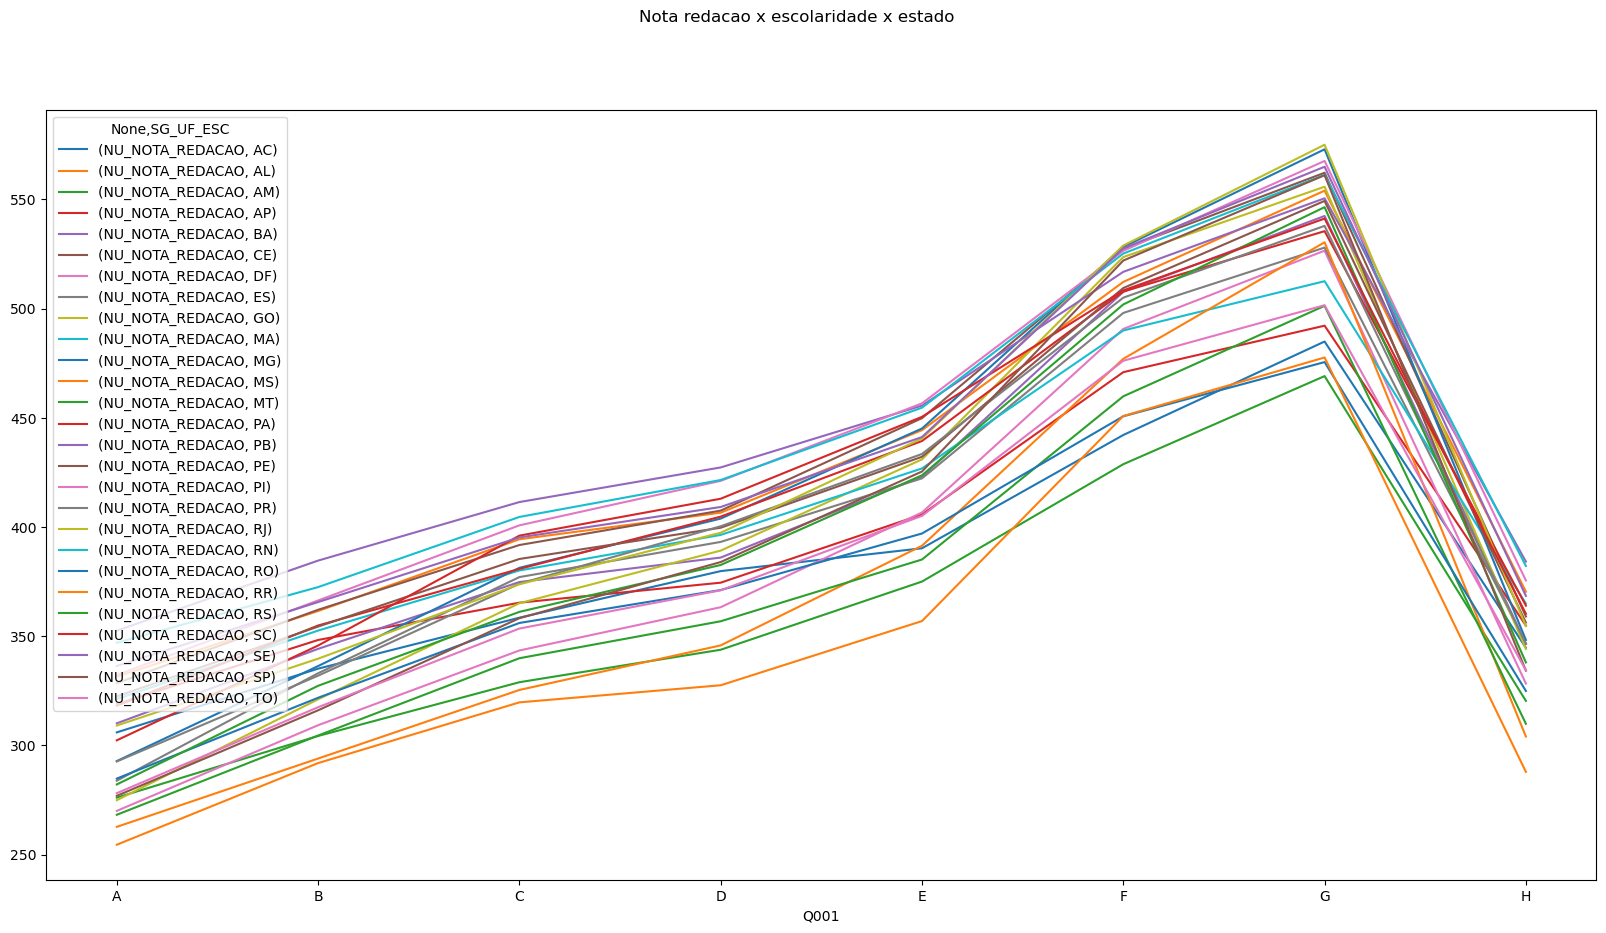

In [103]:
fig, ax = plt.subplots(figsize=(20,10))
plt.suptitle('Nota redacao x escolaridade x estado')

dadosSelecionados[["SG_UF_ESC","Q001","NU_NOTA_REDACAO"]]\
.groupby(['Q001','SG_UF_ESC']).mean().unstack().plot(ax = ax,)

In [91]:
import matplotlib.pyplot as plt